In [1]:
import numpy

import constants
import rscha2d
import trig
import fibonacci_sphere
import coords

from matplotlib import pyplot

%matplotlib nbagg

In [2]:
lat_c = 42.0
lon_c = 20.0
theta_c, phi_c, theta_0d, theta_0 = numpy.deg2rad((90-lat_c, lon_c, 26.0, 50.0))
# knots_bd = numpy.arange(-900, 2000, 100)
knots = numpy.arange(-2000, 2000, 50)
knots_bd = numpy.arange(-2000, 2000, 50)

In [3]:
theta_m, phi_m = fibonacci_sphere.grid(5000)
in_cap = trig.angulardist(theta_m, phi_m, theta_c, phi_c) < theta_0d
theta_m = theta_m[in_cap]; phi_m = phi_m[in_cap]

# theta_m, phi_m = model.theta_geo, model.phi_geo
r_m = numpy.ones_like(theta_m)*constants.a_r
times_dbd, r_dbd, theta_dbd, phi_dbd = coords.anything(r_m, theta_m, phi_m, knots_bd)
times_d, r_d, theta_d, phi_d = coords.anything(r_m, theta_m, phi_m, knots)

In [4]:
import importlib
importlib.reload(rscha2d)

model = rscha2d.Model()
model_bd = rscha2d.Model()
model.set_model_params(theta_c, phi_c, theta_0d, 0.1, 3, 3, 2, knots=knots,
                       temporal_reg=3e-2, spatial_reg=0.8, g10_ref=-37)
model_bd.set_model_params(theta_c, phi_c, theta_0d, 0.1, 3, 3, 2, knots=knots_bd,
                          temporal_reg=3e-2, spatial_reg=0.8, g10_ref=-37)
# model_bd.add_data("../data/rscha2d/bd_shaq.dat")
model_bd.add_data("../data/rscha2d/bd_sai_trim_fil.dat")
model.add_data("../data/rscha2d/bd_syn_sha.dat")

In [5]:
g = model.solve()
g_bd = model_bd.solve()

In [6]:
# adift = model.model_matrix(model.tv, model.r_geo, model.theta_r, model.phi_r)[~model.nan_DIF]
# mreg = model.regularization_matrix()

In [7]:
# view_g = numpy.vstack(numpy.split(g, len(knots)))
# fig, ax = pyplot.subplots(subplot_kw={'aspect': 'equal'})
# fig.colorbar(ax.pcolorfast(adift.T @ adift
#                             + mreg, cmap="Spectral"))

In [8]:
# Dm, Im, Fm = model.synth_data(model.tv, model.r_geo, model.theta_geo, model.phi_geo, g)
Dm, Im, Fm = model.synth_data(times_d, r_d, theta_d, phi_d, g)

Dm = trig.mindiff(Dm, 0)
Im = trig.mindiff(Im, 0)

D_rem, I_rem, F_rem = model.synth_data(model.tv, model.r_geo, model.theta_geo, model.phi_geo, g)
D_rem = trig.mindiff(D_rem, 0)
I_rem = trig.mindiff(I_rem, 0)

Dm_bd, Im_bd, Fm_bd = model_bd.synth_data(times_dbd, r_dbd, theta_dbd, phi_dbd, g_bd)
Dm_bd = trig.mindiff(Dm_bd, 0)
Im_bd = trig.mindiff(Im_bd, 0)

D_rem_bd, I_rem_bd, F_rem_bd = model_bd.synth_data(model_bd.tv, model_bd.r_geo,
                                                   model_bd.theta_geo, model_bd.phi_geo, g_bd)
D_rem_bd = trig.mindiff(D_rem_bd, 0)
I_rem_bd = trig.mindiff(I_rem_bd, 0)

In [9]:
D_res = trig.mindiff(D_rem, model.D_o)[~model.nan_D]
I_res = trig.mindiff(I_rem, model.I_o)[~model.nan_I]
F_res = (F_rem - model.F_o)[~model.nan_F]

D_res_bd = trig.mindiff(D_rem_bd, model_bd.D_o)[~model_bd.nan_D]

I_res_bd = trig.mindiff(I_rem_bd, model_bd.I_o)[~model_bd.nan_I]
F_res_bd = (F_rem_bd - model_bd.F_o)[~model_bd.nan_F]

<IPython.core.display.Javascript object>


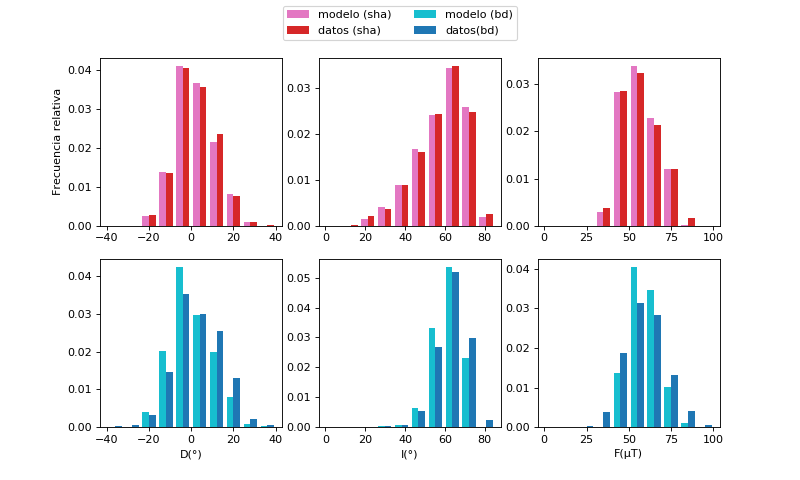

In [10]:
fig, (axes, axes2) = pyplot.subplots(nrows=2, ncols=3, figsize=(10, 6))

axes[0].hist((numpy.rad2deg(D_rem), numpy.rad2deg(model.D_o)),
             color=("C6", "C3"), label=("modelo (sha)", "datos (sha)"), range=(-40, 40), normed=True)
axes2[0].hist((numpy.rad2deg(D_rem_bd), numpy.rad2deg(model_bd.D_o)), color=("C9", "C0"),
             label=("modelo (bd)", "datos(bd)"), range=(-40, 40), normed=True)
axes2[0].set_xlabel("D(°)")

axes[1].hist((numpy.rad2deg(I_rem), numpy.rad2deg(model.I_o)),
             color=("C6", "C3"), label=("modelo (sha)", "datos (sha)"), range=(0, 85), normed=True)
axes2[1].hist((numpy.rad2deg(I_rem_bd), numpy.rad2deg(model_bd.I_o)), color=("C9", "C0"),
             label=("modelo (bd)", "datos(bd)"), range=(0, 85), normed=True)
axes2[1].set_xlabel("I(°)")

axes[2].hist((F_rem, model.F_o),
             color=("C6", "C3"), label=("modelo (sha)", "datos (sha)"), range=(0, 100), normed=True)
axes2[2].hist((F_rem_bd, model_bd.F_o), color=("C9", "C0"),
             label=("modelo (bd)", "datos(bd)"), range=(0, 100), normed=True)
axes2[2].set_xlabel("F(μT)")

axes[0].set_ylabel("Frecuencia relativa")

fig.legend(*(axes[0].get_legend_handles_labels()[0] 
            + axes2[0].get_legend_handles_labels()[0],
            axes[0].get_legend_handles_labels()[1] 
            + axes2[0].get_legend_handles_labels()[1]), 'upper center', ncol=2)

pyplot.show(fig)
#fig.savefig("../data/rscha2d/distribucion.png", frameon=True)

<IPython.core.display.Javascript object>


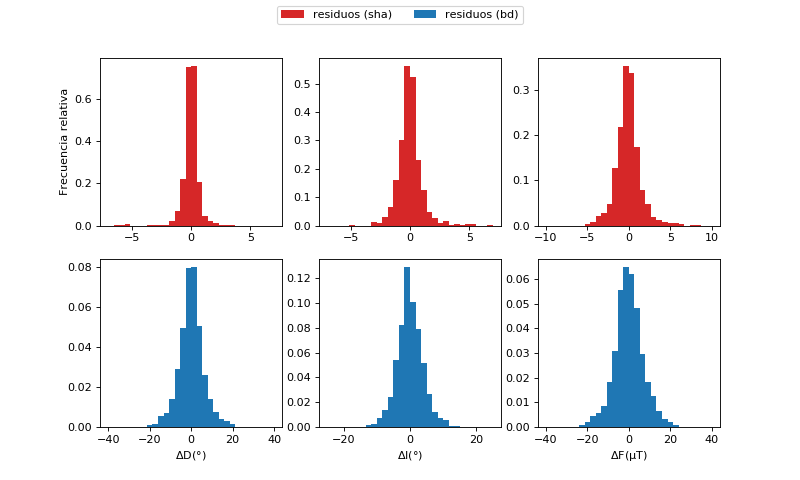

In [11]:
fig, (axes, axes2) = pyplot.subplots(nrows=2, ncols=3, figsize=(10, 6))

axes[0].hist(numpy.rad2deg(D_res),
             color="C3", label="residuos (sha)", range=(-7, 7), normed=True, bins=30)
axes2[0].hist(numpy.rad2deg(D_res_bd), color="C0",
             label="residuos (bd)", range=(-40, 40), normed=True, bins=30)
axes2[0].set_xlabel("$\Delta $D(°)")

axes[1].hist(numpy.rad2deg(I_res),
             color="C3", label="residuos (sha)", range=(-7, 7), normed=True, bins=30)
axes2[1].hist(numpy.rad2deg(I_res_bd), color="C0",
             label="residuos (bd)", range=(-25, 25), normed=True, bins=30)
axes2[1].set_xlabel("$\Delta $I(°)")

axes[2].hist(F_res,
             color="C3", label="residuos (sha)", range=(-10, 10), normed=True, bins=30)
axes2[2].hist(F_res_bd, color="C0",
             label="residuos (bd)", range=(-40, 40), normed=True, bins=30)
axes2[2].set_xlabel("$\Delta $F(μT)")

axes[0].set_ylabel("Frecuencia relativa")

fig.legend(*(axes[0].get_legend_handles_labels()[0] 
            + axes2[0].get_legend_handles_labels()[0],
            axes[0].get_legend_handles_labels()[1] 
            + axes2[0].get_legend_handles_labels()[1]), 'upper center', ncol=2)

pyplot.show(fig)
#fig.savefig("../data/rscha2d/distribucion.png", frameon=True)

#### hay que regularizar esto seguramente -- la maldición de la muerte continúa

<IPython.core.display.Javascript object>


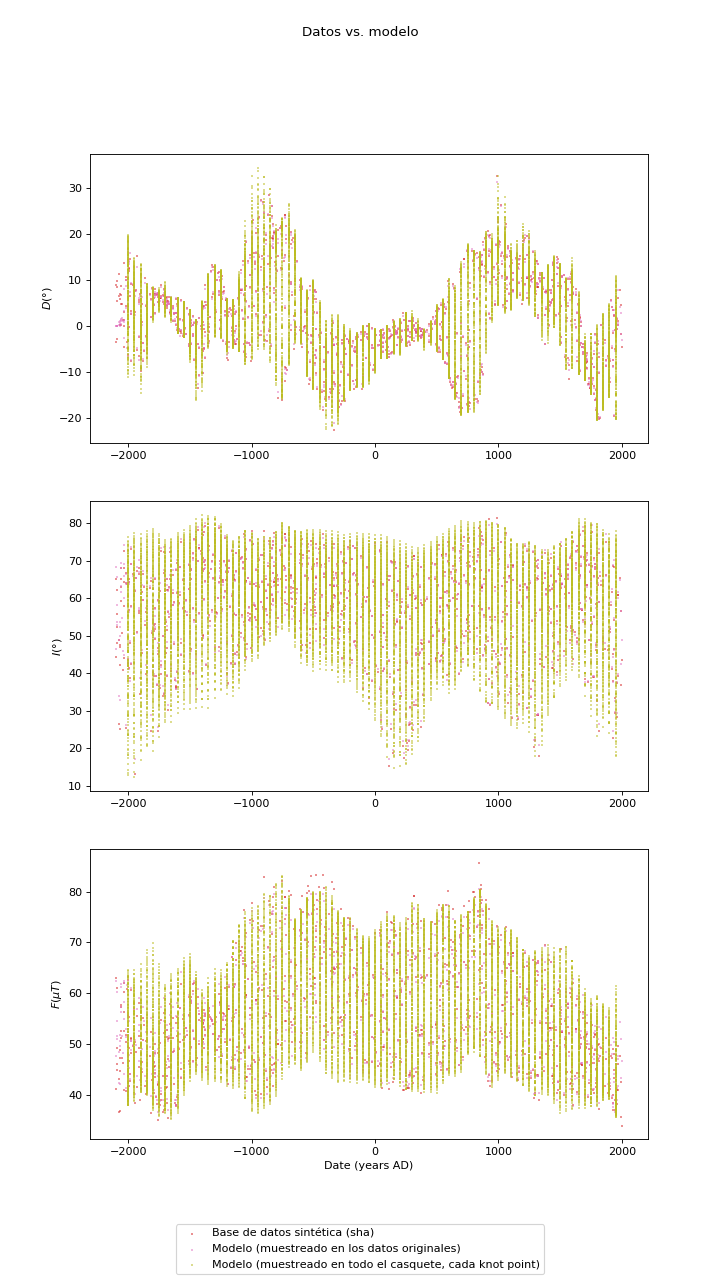

In [12]:
fig, (ax0, ax1, ax2) = pyplot.subplots(3, 1, figsize = (9,16))

common = {"marker":"+", "alpha":0.5, "s":4}

ax0.scatter(model.tv[~model.nan_D], numpy.rad2deg(trig.mindiff(model.D_o[~model.nan_D], 0)),
            color="C3", label="Base de datos sintética (sha)", **common)
ax0.scatter(model.tv, numpy.rad2deg(D_rem),
            color="C6", label="Modelo (muestreado en los datos originales)", **common)
ax0.scatter(times_d, numpy.rad2deg(Dm),
            color="C8", label="Modelo (muestreado en todo el casquete, cada knot point)", **common)
ax1.scatter(model.tv[~model.nan_I], numpy.rad2deg(trig.mindiff(model.I_o[~model.nan_I], 0)),
            color="C3", **common)
ax1.scatter(model.tv[~model.nan_I], numpy.rad2deg(I_rem)[~model.nan_I], color="C6", **common)
ax1.scatter(times_d, numpy.rad2deg(Im), color="C8", **common)
ax2.scatter(model.tv[~model.nan_F], model.F_o[~model.nan_F], color="C3",
           label="Base de datos sintética (sha)", **common)
ax2.scatter(model.tv[~model.nan_F], F_rem[~model.nan_F], color="C6", **common)
ax2.scatter(times_d, Fm, color="C8", **common)

ax0.set_ylabel("$D (°)$")
ax1.set_ylabel("$I (°)$")
ax2.set_ylabel("$F (\mu T)$")
ax2.set_xlabel("Date (years AD)")

fig.legend(*ax0.get_legend_handles_labels(), loc="lower center", ncol=1)
fig.suptitle("Datos vs. modelo")
pyplot.show(fig)

In [13]:
out_D, out_I, out_F = model_bd.find_outliers()

In [14]:
inliers = ~(out_D | out_I | out_F)

#with open("../data/rscha2d/bd_sai_trim_fil.dat", "w") as f:
#    for i, line in enumerate(open("../data/rscha2d/bd_sai_trim.dat", "r")):
#        if i in model_bd.ids[inliers]:
#            f.write(line)

    

In [15]:
smin = 81/140*numpy.deg2rad(4.3)
sigma_D = 81/140*model_bd.a95/numpy.cos(model_bd.I_o)
sigma_D[numpy.isnan(sigma_D) | (sigma_D < smin)] = smin
sigma_I = 81/140*model_bd.a95
sigma_I[numpy.isnan(sigma_I) | (sigma_I < smin)] = smin
D_nrms_bd = numpy.abs(D_res_bd/sigma_D[~model_bd.nan_D])
I_nrms_bd = numpy.abs(I_res_bd/sigma_I[~model_bd.nan_I])
F_nrms_bd = numpy.abs(F_res_bd/model_bd.F_err[~model_bd.nan_F])
F_nrms_bd[numpy.isinf(F_nrms_bd)] = numpy.nan

In [16]:
out_F = numpy.abs((F_rem_bd - model_bd.F_o)) > 3*model_bd.F_err
out_D = numpy.abs(trig.mindiff(D_rem_bd, model_bd.D_o)) > 3*sigma_D
out_I = numpy.abs(trig.mindiff(I_rem_bd, model_bd.I_o)) > 3*sigma_I

<IPython.core.display.Javascript object>


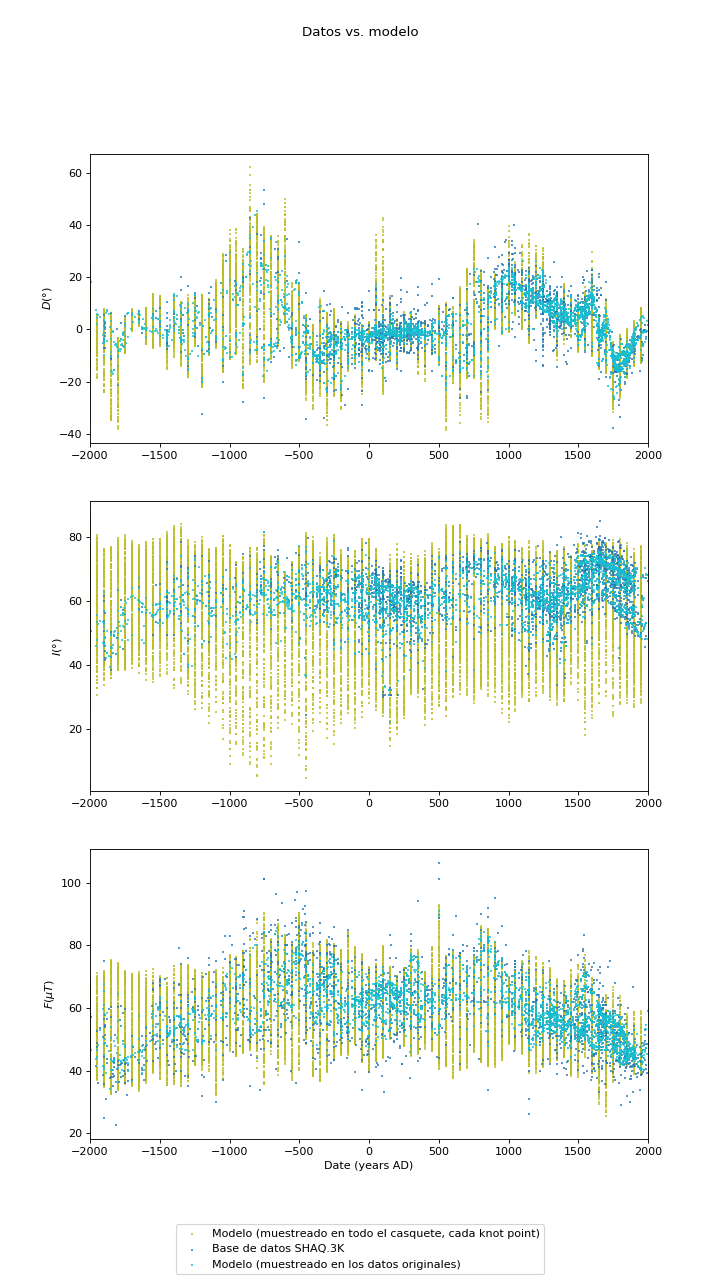

In [17]:
fig, (ax0, ax1, ax2) = pyplot.subplots(3, 1, figsize = (9,16))

common = {"marker":"+", "alpha":0.75, "s":4}

ax0.scatter(times_dbd, numpy.rad2deg(Dm_bd),
            color="C8", label="Modelo (muestreado en todo el casquete, cada knot point)", **common)
ax0.scatter(model_bd.tv[~model_bd.nan_D], numpy.rad2deg(trig.mindiff(model_bd.D_o[~model_bd.nan_D], 0)),
            color="C0", label="Base de datos SHAQ.3K", **common)
ax0.scatter(model_bd.tv, numpy.rad2deg(D_rem_bd),
            color="C9", label="Modelo (muestreado en los datos originales)", **common)

ax1.scatter(times_dbd, numpy.rad2deg(Im_bd),
            color="C8", **common)
ax1.scatter(model_bd.tv[~model_bd.nan_I], numpy.rad2deg(trig.mindiff(model_bd.I_o[~model_bd.nan_I], 0)),
            color="C0", **common)
ax1.scatter(model_bd.tv, numpy.rad2deg(I_rem_bd),
            color="C9", **common)

ax2.scatter(times_dbd, Fm_bd, color="C8", **common)
ax2.scatter(model_bd.tv[~model_bd.nan_F], model_bd.F_o[~model_bd.nan_F],
            #c=model_bd.thetav[~model_bd.nan_F],
            color="C0",
            **common)
ax2.scatter(model_bd.tv, F_rem_bd,
            #c=model_bd.thetav,
            color="C9",
            **common)



ax0.set_ylabel("$D (°)$")
ax1.set_ylabel("$I (°)$")
ax2.set_ylabel("$F (\mu T)$")
ax2.set_xlabel("Date (years AD)")

for ax in (ax0, ax1, ax2):
    ax.set_xbound(-2000, 2000)

fig.suptitle("Datos vs. modelo")
fig.legend(*ax0.get_legend_handles_labels(), loc="lower center", ncol=1)
pyplot.show(fig)

##### hmm, sooooooo este comportamiento es correcto? HMM

heck fuckgin YES i think... el comportamiento de la intensidad es un poco más sospechoso pero seguramente se puede explicar por el mismo mecanismo

In [18]:
t_cur = numpy.linspace(-2000, 2000, 400)
name_at = "Madrid"
theta_at, phi_at = numpy.deg2rad((90 - 40.423, -3.7))

t_cur, r_cur, theta_cur, phi_cur = coords.curve_at(t_cur, constants.a_r, theta_at, phi_at)
D_cur_bd, I_cur_bd, F_cur_bd = model_bd.synth_data(t_cur, r_cur, theta_cur, phi_cur, g_bd)
D_cur_bd = trig.mindiff(D_cur_bd, 0)
I_cur_bd = trig.mindiff(I_cur_bd, 0)
D_cur_s, I_cur_s, F_cur_s = model.synth_data(t_cur, r_cur, theta_cur, phi_cur, g)
D_cur_s = trig.mindiff(D_cur_s, 0)
I_cur_s = trig.mindiff(I_cur_s, 0)

In [19]:
import geofield
import xyzfield

sha = geofield.SHADIFData("../data/sha.dif.14k/coeff_SHA.DIF.14k.dat",
                          "../data/sha.dif.14k/error_coef_EPSL_tnmgh.dat")

D_shadif = numpy.empty_like(sha.years)
I_shadif = numpy.empty_like(sha.years)
F_shadif = numpy.empty_like(sha.years)

years = numpy.array(sha.years)

for i, y in enumerate(sha.years):
    dec,inc,f,h = xyzfield.xyz2difh(*xyzfield.xyzfieldv2(sha.gcomp[i, :],
                                                         numpy.atleast_1d(phi_at),
                                                         numpy.atleast_1d(theta_at)))
    D_shadif[i] = dec
    I_shadif[i] = inc
    F_shadif[i] = f
    
D_shadif, I_shadif = numpy.rad2deg((D_shadif, I_shadif))

<IPython.core.display.Javascript object>


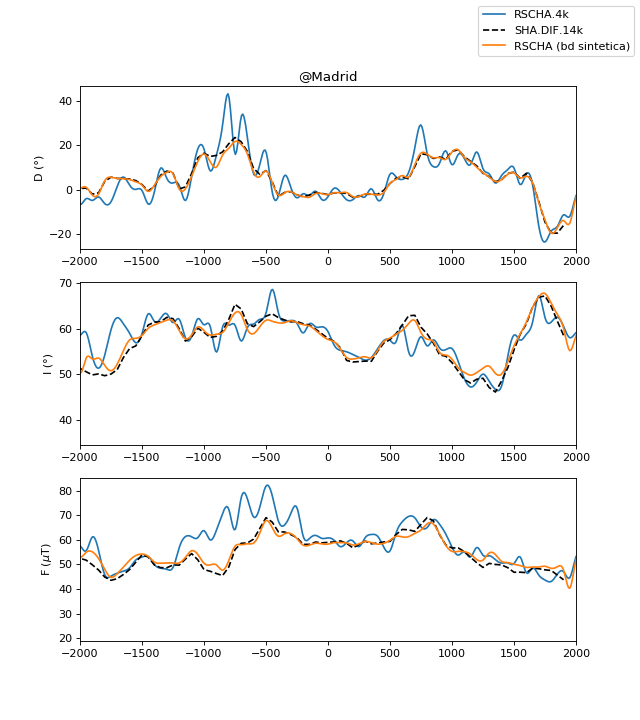

In [20]:
fig, (ax0, ax1, ax2) = pyplot.subplots(3,1, figsize=(8,9))

ax0.plot(t_cur, numpy.rad2deg(D_cur_bd), label="RSCHA.4k")
ax0.plot(years, D_shadif, "k--", label="SHA.DIF.14k")
ax0.plot(t_cur, numpy.rad2deg(D_cur_s), label="RSCHA (bd sintetica)")
ax0.set_ylabel("D (°)")
ax1.plot(t_cur, numpy.rad2deg(I_cur_bd))
ax1.plot(years, I_shadif, "k--")
ax1.plot(t_cur, numpy.rad2deg(I_cur_s), label="RSCHA (bd sintetica)")
ax1.set_ylabel("I (°)")
ax2.plot(t_cur, F_cur_bd)
ax2.plot(years, F_shadif, "k--")
ax2.plot(t_cur, F_cur_s, label="RSCHA (bd sintetica)")
ax2.set_ylabel("F ($\mu $T)")

ax0.set_title("@{}".format(name_at))

for ax in (ax0, ax1, ax2):
    ax.set_xbound(-2000, 2000)
    
fig.legend(*ax0.get_legend_handles_labels())

In [61]:
out_D = (numpy.abs(trig.mindiff(D_rem_bd, model_bd.D_o)) > 3*numpy.std(D_res_bd))
out_I = (numpy.abs(trig.mindiff(I_rem_bd, model_bd.I_o)) > 3*numpy.std(I_res_bd))
out_F = (numpy.abs(F_rem_bd - model_bd.F_o) > 3*numpy.std(F_res_bd))

In [62]:
inliers = ~(out_D | out_I | out_F)

with open("../data/rscha2d/bd_sai_trim_fil.dat", "w") as f:
    for i, line in enumerate(open("../data/rscha2d/bd_sai_trim.dat", "r")):
        if i in model_bd.ids[inliers]:
            f.write(line)